In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [19]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [20]:
df.shape

(29922, 6)

In [21]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [51]:
df['ordered_at'] = pd.to_datetime(df['ordered_at'])

In [47]:
df['line_total']=pd.to_numeric(df['line_total'].apply(lambda x:x[1:]))

In [52]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                 object
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [34]:
df[df.duplicated()].shape[0]

538

In [56]:
df = df.drop(list(df[df.duplicated()].index))
df

,order_id,name,ordered_at,price,quantity,line_total
139,10049,"""CONE"" Dipped Waffle Cone",2018-01-02 13:47:55,$3.50,1,3.5
178,10063,"""ICE CREAM"" Earl Gray",2018-01-02 21:28:36,$0.50,3,1.5
207,10073,"""ICE CREAM"" Mint Chip",2018-01-03 01:45:00,$1.50,3,4.5
273,10091,"""SORBET"" Blood Orange",2018-01-03 09:14:48,$2.50,2,5.0
278,10092,"""CONE"" Sugar Cone",2018-01-03 09:44:29,$1.00,2,2.0
351,10118,"""SORBET"" Blood Orange",2018-01-03 22:56:09,$2.50,3,7.5
500,10167,"""ICE CREAM"" Matcha",2018-01-04 18:18:03,$1.50,1,1.5
768,10258,"""ICE CREAM"" Candied Bacon",2018-01-06 12:15:38,$0.50,1,0.5
776,10260,"""ICE CREAM"" Wildberry",2018-01-06 13:20:51,$1.50,2,3.0
814,10271,"""MISC"" Ice Cream Cake",2018-01-06 16:46:11,$2.00,3,6.0


In [58]:
df.isnull()

,order_id,name,ordered_at,price,quantity,line_total
139,False,False,False,False,False,False
178,False,False,False,False,False,False
207,False,False,False,False,False,False
273,False,False,False,False,False,False
278,False,False,False,False,False,False
351,False,False,False,False,False,False
500,False,False,False,False,False,False
768,False,False,False,False,False,False
776,False,False,False,False,False,False
814,False,False,False,False,False,False


In [25]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
6,10002,NaN,2018-01-01 12:23:09,$3.00,3,$9.00
27,10007,NaN,2018-01-01 15:03:17,$2.50,1,$2.50
77,10026,NaN,2018-01-02 03:25:40,$0.50,2,$1.00
88,10031,NaN,2018-01-02 05:45:48,$3.50,3,$10.50


#### Sanity check for value ranges and to check assumptions

In [26]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

19924

In [67]:
df[df['line_total'] < 0].shape[0]
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [71]:
df['line_total']=df['price']*df['quantity']
df

,order_id,name,ordered_at,price,quantity,line_total
139,10049,"""CONE"" Dipped Waffle Cone",2018-01-02 13:47:55,3.5,1,3.5
178,10063,"""ICE CREAM"" Earl Gray",2018-01-02 21:28:36,0.5,3,1.5
207,10073,"""ICE CREAM"" Mint Chip",2018-01-03 01:45:00,1.5,3,4.5
273,10091,"""SORBET"" Blood Orange",2018-01-03 09:14:48,2.5,2,5.0
278,10092,"""CONE"" Sugar Cone",2018-01-03 09:44:29,1.0,2,2.0
351,10118,"""SORBET"" Blood Orange",2018-01-03 22:56:09,2.5,3,7.5
500,10167,"""ICE CREAM"" Matcha",2018-01-04 18:18:03,1.5,1,1.5
768,10258,"""ICE CREAM"" Candied Bacon",2018-01-06 12:15:38,0.5,1,0.5
776,10260,"""ICE CREAM"" Wildberry",2018-01-06 13:20:51,1.5,2,3.0
814,10271,"""MISC"" Ice Cream Cake",2018-01-06 16:46:11,2.0,3,6.0


In [118]:
df.describe()

,order_id,price,quantity,line_total
count,529.000000,529.00000,529.000000,529.000000
mean,14894.508507,2.42344,2.041588,4.935728
std,2884.990683,1.13372,0.824673,3.191731
min,10029.000000,-2.50000,1.000000,-7.500000
25%,12496.000000,1.50000,1.000000,2.500000
50%,14666.000000,2.50000,2.000000,4.000000
75%,17284.000000,3.50000,3.000000,7.500000
max,19996.000000,4.00000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [116]:


df['catogory'] = df['name'].apply(lambda x: re.search(r'["].+["]',str(x)).group(0) if  re.search(r'["].+["]',str(x)) else 'no category' )

In [117]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,catogory
139,10049,"""CONE"" Dipped Waffle Cone",2018-01-02 13:47:55,3.5,1,3.5,"""CONE"""
178,10063,"""ICE CREAM"" Earl Gray",2018-01-02 21:28:36,0.5,3,1.5,"""ICE CREAM"""
207,10073,"""ICE CREAM"" Mint Chip",2018-01-03 01:45:00,1.5,3,4.5,"""ICE CREAM"""
273,10091,"""SORBET"" Blood Orange",2018-01-03 09:14:48,2.5,2,5.0,"""SORBET"""
278,10092,"""CONE"" Sugar Cone",2018-01-03 09:44:29,1.0,2,2.0,"""CONE"""


#### Analysis, finally!

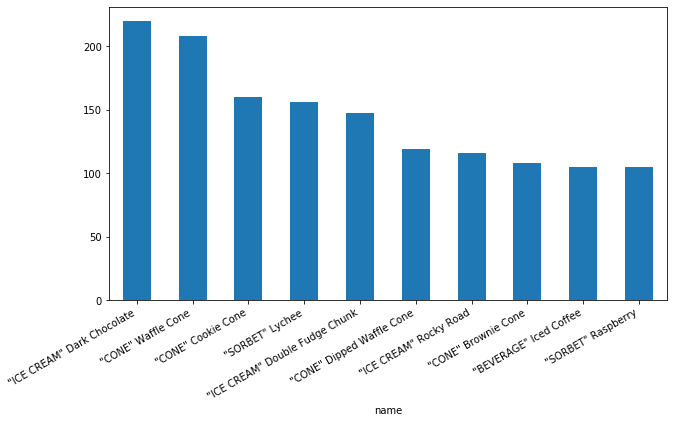

In [121]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()